In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="dark", palette="muted", color_codes=True)

# 1. 生成数据

数据为$y=\sin(x)+\epsilon$, $\epsilon \sim N(0, \sigma)$

In [3]:
n_train_sample = 10
n_test_sample = 100
sigma = 0.2

x_train = np.linspace(0.0, 1.0, n_train_sample).reshape(-1,1)
y_train = np.sin(x_train*2*np.pi)+np.random.normal(0.0, sigma, x_train.shape)

x_test = np.random.uniform(0.0, 1.0, n_test_sample).reshape(-1,1)
y_test = np.sin(x_test*2*np.pi)+np.random.normal(0.0, sigma, x_test.shape)

x_ground_truth = np.linspace(0.0, 1.0, 1000).reshape(-1,1)
y_ground_truth = np.sin(x_ground_truth*2*np.pi)

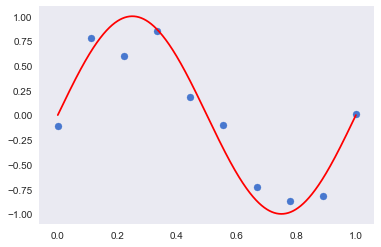

In [4]:
plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')

# 2. 过拟合

MSE_train_set = 0.21534959414362306
 MSE_test_set = 0.29031855129491013


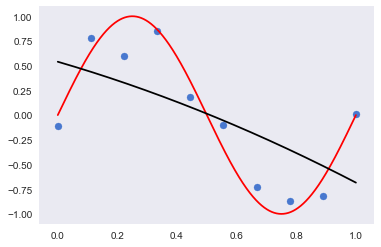

In [5]:
degree = 2
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

MSE_train_set = 0.013525292808191106
 MSE_test_set = 0.060790021164045964


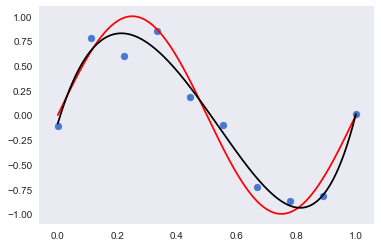

In [6]:
degree = 5
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

MSE_train_set = 1.1761012862247473e-21
 MSE_test_set = 0.4097942649387707


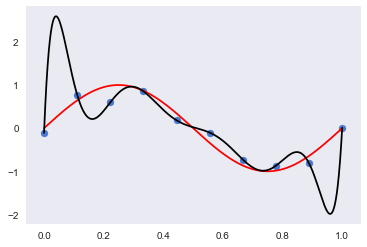

In [7]:
degree = 9
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.216,0.286,-1.223,nan,nan,nan,nan,nan,nan,nan,nan
2,0.215,0.290,-0.879,-0.344,nan,nan,nan,nan,nan,nan,nan
3,0.015,0.050,9.679,-28.172,18.553,nan,nan,nan,nan,nan,nan
4,0.014,0.053,8.393,-21.674,8.129,5.212,nan,nan,nan,nan,nan
5,0.014,0.061,10.069,-35.648,47.629,-40.064,18.110,nan,nan,nan,nan
6,0.013,0.063,13.068,-72.649,206.887,-347.826,291.870,-91.253,nan,nan,nan
7,0.009,0.064,23.713,-248.295,1248.484,-3293.006,4586.801,-3208.112,890.531,nan,nan
8,0.007,0.070,43.126,-639.785,4201.330,-14432.454,27778.061,-30264.582,17455.717,-4141.296,nan
9,0.000,0.410,168.434,-3534.181,30272.218,-136910.010,361452.416,-576636.132,547402.184,-284521.529,62306.718


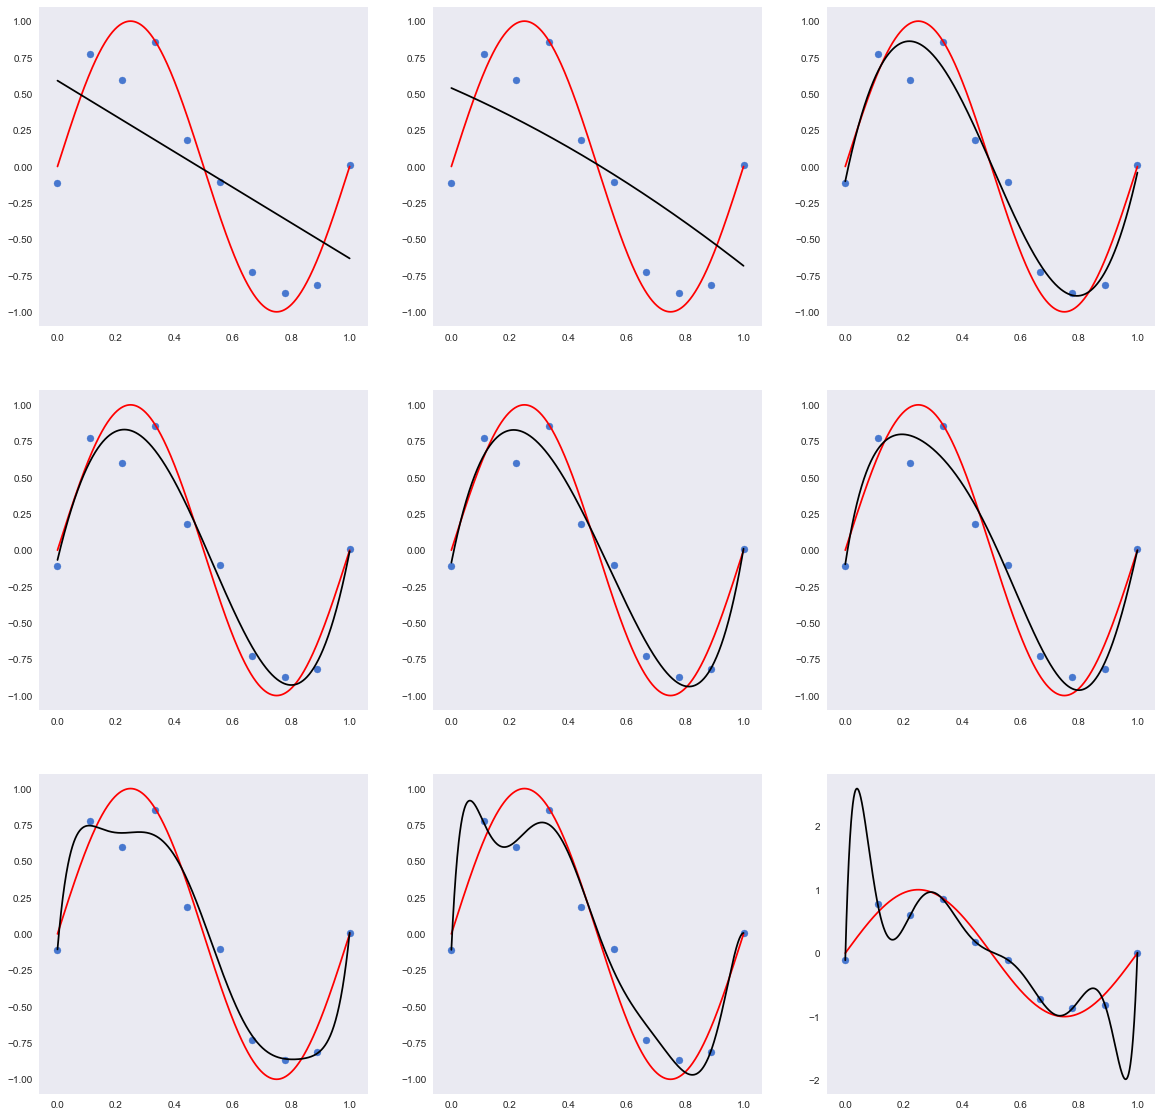

In [8]:
with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train)
        model = LinearRegression()
        model.fit(x_train_tf, y_train)

        MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train, y_train)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

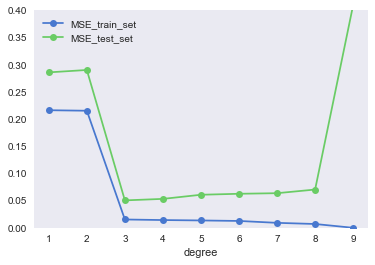

In [9]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

# 3. 解决过拟合
## 方法一. 增加数据量

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.241,0.240,-1.945,nan,nan,nan,nan,nan,nan,nan,nan
2,0.241,0.240,-1.964,0.019,nan,nan,nan,nan,nan,nan,nan
3,0.043,0.040,12.066,-35.090,23.406,nan,nan,nan,nan,nan,nan
4,0.043,0.040,11.404,-32.104,18.758,2.324,nan,nan,nan,nan,nan
5,0.038,0.034,4.941,13.316,-102.545,138.858,-54.613,nan,nan,nan,nan
6,0.038,0.034,5.468,8.013,-81.280,98.943,-19.474,-11.713,nan,nan,nan
7,0.038,0.034,6.639,-7.922,7.572,-145.837,333.310,-266.586,72.821,nan,nan
8,0.038,0.035,9.831,-64.409,423.870,-1710.965,3593.273,-4072.551,2403.659,-582.710,nan
9,0.038,0.034,7.804,-19.178,-1.002,367.425,-2237.650,5656.541,-7132.548,4484.640,-1126.078


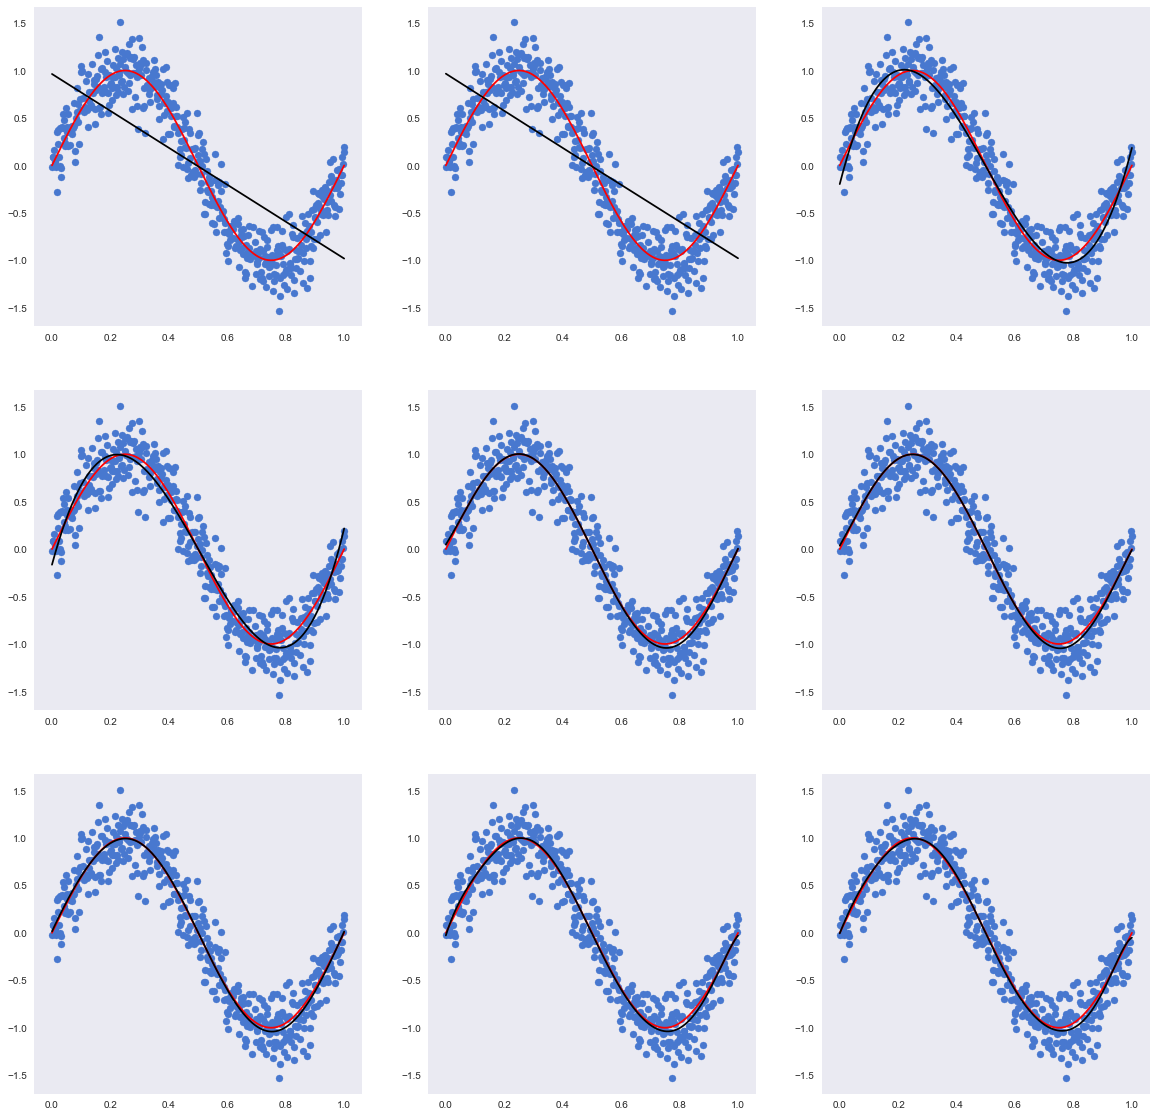

In [10]:
n_train_sample_large = 500

x_train_large = np.linspace(0.0, 1.0, n_train_sample_large).reshape(-1,1)
y_train_large = np.sin(x_train_large*2*np.pi)+np.random.normal(0.0, sigma, x_train_large.shape)

with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train_large)
        model = LinearRegression()
        model.fit(x_train_tf, y_train_large)

        MSE_train_set = mean_squared_error(y_train_large, model.predict(poly.transform(x_train_large)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train_large, y_train_large)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

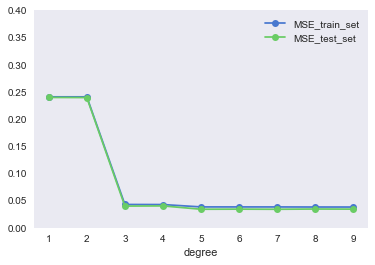

In [11]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

## 方法二：正则化

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.216,0.286,-1.223,nan,nan,nan,nan,nan,nan,nan,nan
2,0.215,0.290,-0.877,-0.346,nan,nan,nan,nan,nan,nan,nan
3,0.021,0.067,7.749,-23.302,15.392,nan,nan,nan,nan,nan,nan
4,0.016,0.062,6.456,-14.041,-2.144,9.696,nan,nan,nan,nan,nan
5,0.018,0.067,5.903,-12.225,-1.527,3.868,3.966,nan,nan,nan,nan
6,0.018,0.068,5.883,-12.206,-1.410,3.834,3.609,0.276,nan,nan,nan
7,0.017,0.066,5.910,-12.046,-1.879,3.475,4.043,1.915,-1.434,nan,nan
8,0.017,0.063,5.886,-11.733,-2.238,2.913,3.907,2.671,0.491,-1.917,nan
9,0.017,0.062,5.840,-11.456,-2.377,2.492,3.575,2.766,1.250,-0.354,-1.762


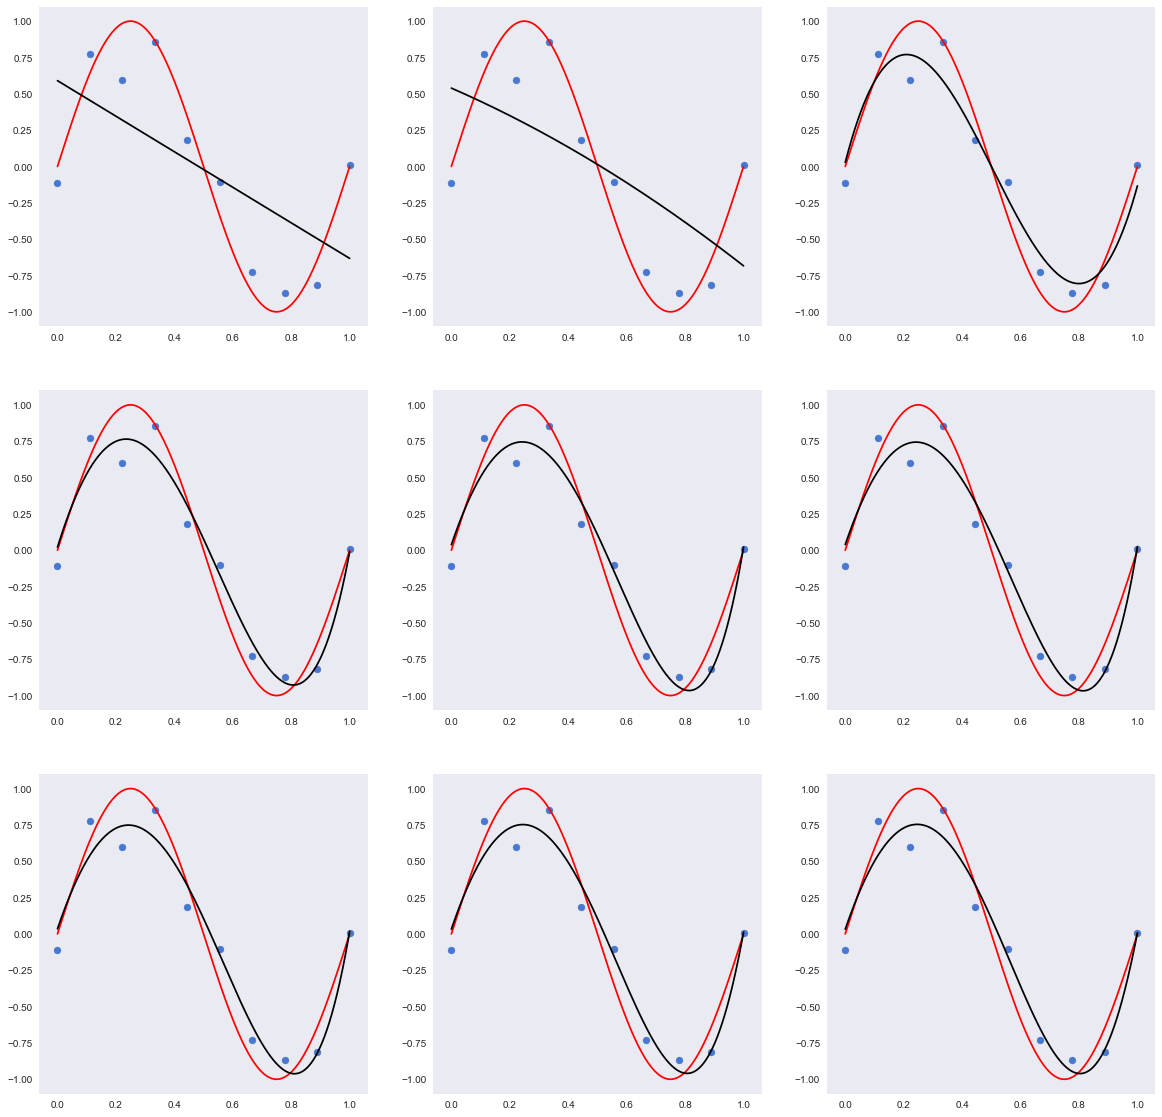

In [12]:
with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train)
        model = Ridge(alpha=math.exp(-8))
        model.fit(x_train_tf, y_train)

        MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train, y_train)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

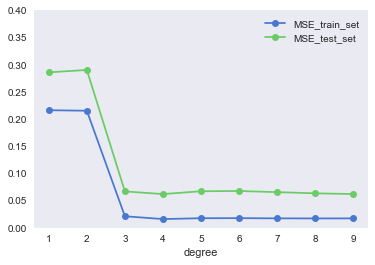

In [13]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

正则化参数对w与误差的影响

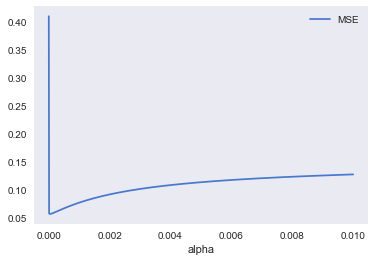

In [14]:
df = pd.DataFrame(columns=["alpha"]+list(map(lambda x:"w%d" % x, range(0,9)))+["MSE"])

for i, alpha in enumerate(np.linspace(0, 0.01, 1000)):
    degree = 9
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_tf = poly.fit_transform(x_train)
    model = Ridge(alpha=alpha)
    model.fit(x_train_tf, y_train)

    MSE = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
    
    df.loc[i, "alpha"] = alpha
    for j in range(len(model.coef_[0])):
        df.loc[i, "w%d" % j] = model.coef_[0][j]
    df.loc[i, "MSE"] = MSE

df.plot(x='alpha', y='MSE')